# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





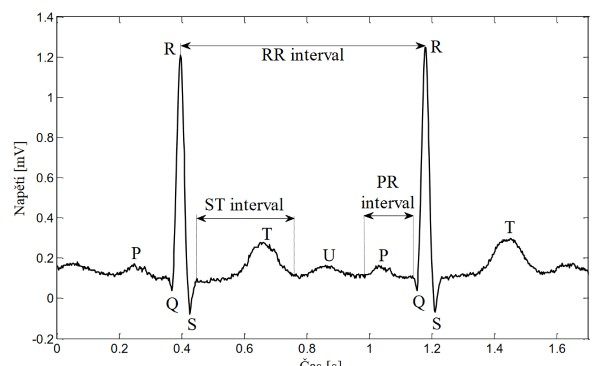

#### EKG ve spektru

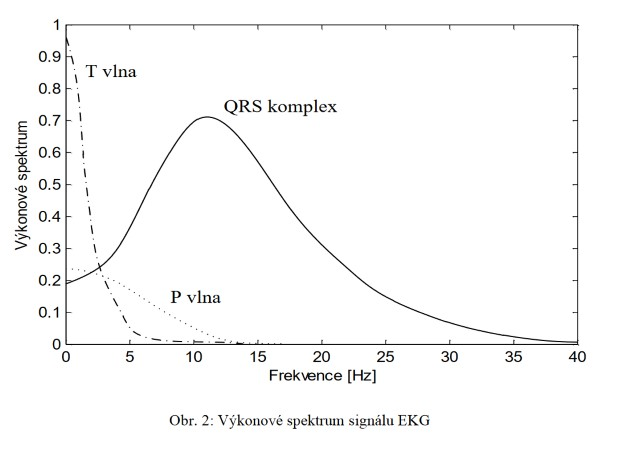

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xkhoda01.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xkhoda01.wav")

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

In [2]:
odkud = 0
kolik = 5

odkud_vz = int(odkud * fs)
pokud_vz = int((odkud+kolik) * fs)

x_seg = x[odkud_vz:pokud_vz]
N = x_seg.size


b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

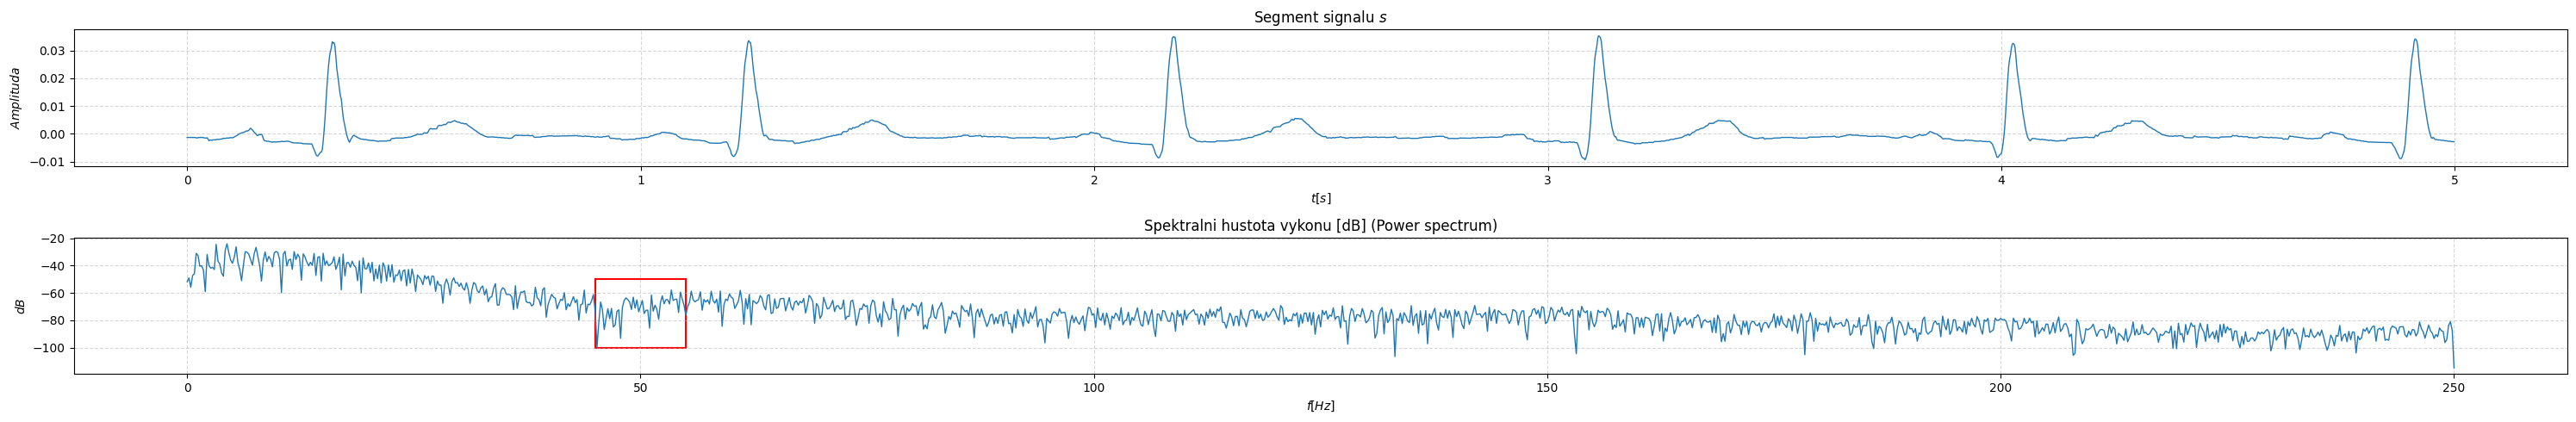

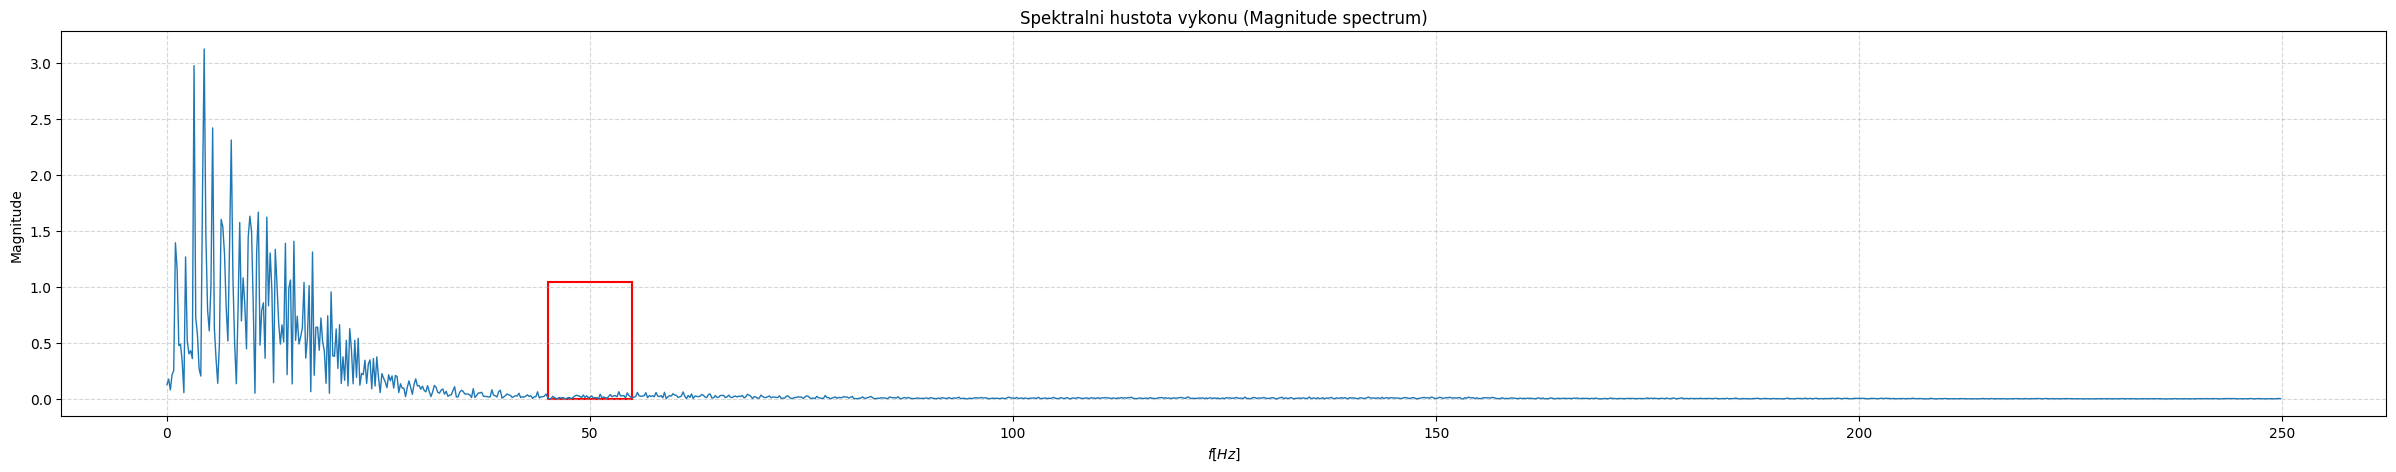

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_seg_spec = np.fft.fft(x_seg)
G = 10 * np.log10(1/N * np.abs(x_seg_spec)**2)
f = np.arange(G.size) / N * fs

_, ax = plt.subplots(2,1, figsize=(30,5))

ax[0].plot(np.arange(x_seg.size) / fs + odkud, x_seg, lw=1)
ax[0].set_xlabel('$t[s]$')
ax[0].set_ylabel('$Amplituda$')
ax[0].set_title('Segment signalu $s$')
ax[0].grid(alpha=0.5, linestyle='--')

ax[1].plot(f[:f.size//2+1], G[:G.size//2+1], lw=1)
ax[1].set_xlabel('$f[Hz]$')
ax[1].set_ylabel('$dB$')
ax[1].set_title('Spektralni hustota vykonu [dB] (Power spectrum)')
ax[1].grid(alpha=0.5, linestyle='--')

rect = patches.Rectangle((45, -100), 10, 50, linewidth=1.5, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.tight_layout()

#----------------------------------------------------

power_spectrum = np.abs(x_seg_spec)

freq_axis = np.fft.fftfreq(len(x_seg), 1 / fs)

pos_freq_axis = freq_axis[:len(x_seg)//2]
pos_power_spectrum = power_spectrum[:len(x_seg)//2]

plt.figure(figsize=(30, 5))
plt.plot(pos_freq_axis, pos_power_spectrum, lw=1)
plt.title('Spektralni hustota vykonu (Magnitude spectrum)')
plt.xlabel('$f[Hz]$')
plt.ylabel('Magnitude')
plt.grid(True)
plt.grid(alpha=0.5, linestyle='--')
rect = patches.Rectangle((45, 0), 10, max(pos_power_spectrum)/3, linewidth=1.5, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.show()


 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích je způsobeno elektrickým napájením. Tyto frekvence jsou základní frekvencí elektrické sítě a jejich harmonické se objevují jako násobky této základní frekvence. Může být indukováno do audio signálů prostřednictvím elektromagnetické interference z napájecích kabelů, rozvodných systémů, nebo jako následek zemních smyček v audio zařízení.


### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [4]:
from scipy.signal import resample, butter, filtfilt

new_fs = 100

# Filter setup
cutoff = new_fs / 2 * 0.9
# b, a = butter(3, cutoff, btype='low', fs=fs/2)
b, a = butter(3, cutoff, btype='low', fs=fs)
filtered = filtfilt(b, a, x_seg)

# Calculate new number of samples
new_N = int(len(filtered) * new_fs / fs)

# Resample
resampled_x_seg = resample(filtered, new_N)

# Calculate new time vector
time_vector_resampled = np.arange(new_N) / new_fs

# Frequency spectrum
resampled_x_seg_spec = np.fft.fft(resampled_x_seg)
G_res = 10 * np.log10(1/new_N * np.abs(resampled_x_seg_spec)**2)
f_res = np.arange(G_res.size) / new_N * new_fs




b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

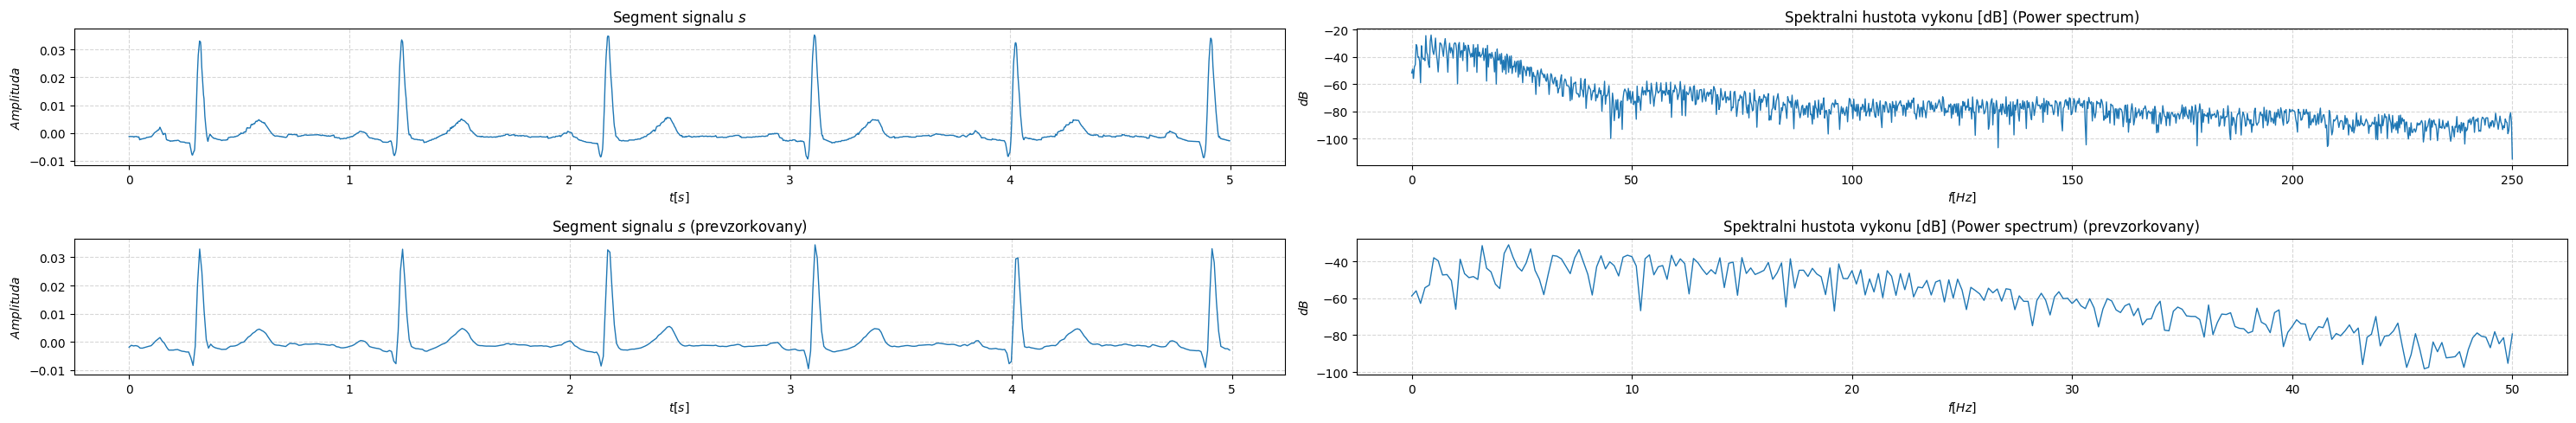

In [5]:
from scipy.signal import spectrogram

_, ax = plt.subplots(2,2, figsize=(30,5))

# Original signal
ax[0,0].plot(np.arange(x_seg.size) / fs + odkud, x_seg, lw=1)
ax[0,0].set_xlabel('$t[s]$')
ax[0,0].set_ylabel('$Amplituda$')
ax[0,0].set_title('Segment signalu $s$')
ax[0,0].grid(alpha=0.5, linestyle='--')
plt.tight_layout()


# Original signal spectre
f = np.arange(G.size) / N * fs
ax[0,1].plot(f[:f.size//2+1], G[:G.size//2+1], lw=1)
ax[0,1].set_xlabel('$f[Hz]$')
ax[0,1].set_ylabel('$dB$')
ax[0,1].set_title('Spektralni hustota vykonu [dB] (Power spectrum)')
ax[0,1].grid(alpha=0.5, linestyle='--')
plt.tight_layout()


# Resampled signal
ax[1,0].plot(np.arange(new_N) / new_fs + odkud, resampled_x_seg, lw=1)
ax[1,0].set_ylabel('$Amplituda$')
ax[1,0].set_xlabel('$t[s]$')
ax[1,0].set_title('Segment signalu $s$ (prevzorkovany)')
ax[1,0].grid(alpha=0.5, linestyle='--')
plt.tight_layout()


# Resampled signal spectre
ax[1,1].plot(f_res[:f_res.size//2+1], G_res[:G_res.size//2+1], lw=1)
ax[1,1].set_xlabel('$f[Hz]$')
ax[1,1].set_ylabel('$dB$')
ax[1,1].set_title('Spektralni hustota vykonu [dB] (Power spectrum) (prevzorkovany)')
ax[1,1].grid(alpha=0.5, linestyle='--')


### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

Filtr je stabilní.


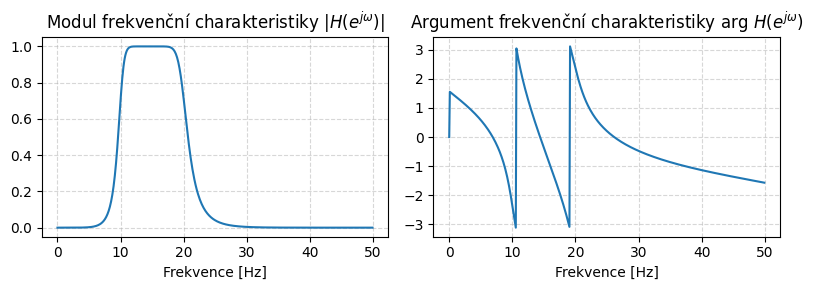

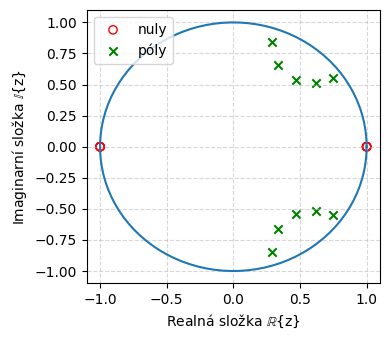

In [6]:
from scipy.signal import lfilter, tf2zpk, freqz

lowcut = 10
highcut = 20
order = 5

b, a = butter(order, [lowcut, highcut], btype='band', fs=new_fs)

# frekvencni charakteristika
w, H = freqz(b, a)

# nuly, poly
z, p, k = tf2zpk(b, a)

# stabilita
is_stable = (p.size == 0) or np.all(np.abs(p) < 1)

#---------------------------------------

_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w / 2 / np.pi * new_fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * new_fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

#---------------------------------------

plt.figure(figsize=(4,3.5))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')
print('Filtr {} stabilní.'.format('je' if is_stable else 'není'))
plt.tight_layout()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


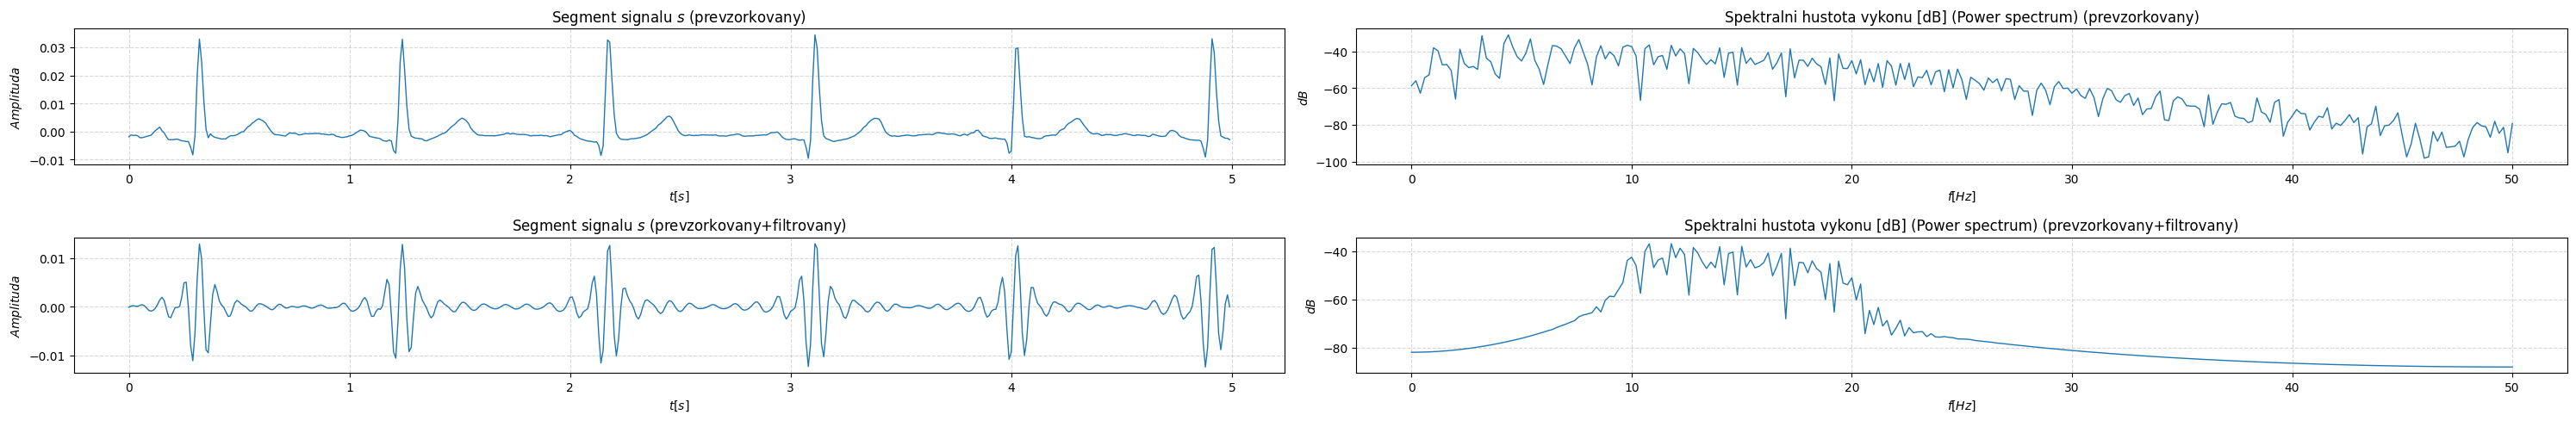

In [7]:
_, ax = plt.subplots(2,2, figsize=(30,5))

ax[0,0].plot(np.arange(resampled_x_seg.size) / new_fs + odkud, resampled_x_seg, lw=1)
ax[0,0].set_ylabel('$Amplituda$')
ax[0,0].set_xlabel('$t[s]$')
ax[0,0].set_title('Segment signalu $s$ (prevzorkovany)')
ax[0,0].grid(alpha=0.5, linestyle='--')
plt.tight_layout()

filtered_resampled_x_seg = filtfilt(b, a, resampled_x_seg)

ax[1,0].plot(np.arange(filtered_resampled_x_seg.size) / new_fs + odkud, filtered_resampled_x_seg, lw=1)
ax[1,0].set_ylabel('$Amplituda$')
ax[1,0].set_xlabel('$t[s]$')
ax[1,0].set_title('Segment signalu $s$ (prevzorkovany+filtrovany)')
ax[1,0].grid(alpha=0.5, linestyle='--')
plt.tight_layout()

ax[0,1].plot(f_res[:f_res.size//2+1], G_res[:G_res.size//2+1], lw=1)
ax[0,1].set_xlabel('$f[Hz]$')
ax[0,1].set_ylabel('$dB$')
ax[0,1].set_title('Spektralni hustota vykonu [dB] (Power spectrum) (prevzorkovany)')
ax[0,1].grid(alpha=0.5, linestyle='--')

plt.tight_layout()
filt_res_x_seg_spec = np.fft.fft(filtered_resampled_x_seg)
G_res_filt = 10 * np.log10(1/new_N * np.abs(filt_res_x_seg_spec)**2)
f_res_filt = np.arange(G_res_filt.size) / new_N * new_fs

ax[1,1].plot(f_res_filt[:f_res_filt.size//2+1], G_res_filt[:G_res_filt.size//2+1], lw=1)
ax[1,1].set_xlabel('$f[Hz]$')
ax[1,1].set_ylabel('$dB$')
ax[1,1].set_title('Spektralni hustota vykonu [dB] (Power spectrum) (prevzorkovany+filtrovany)')
ax[1,1].grid(alpha=0.5, linestyle='--')
plt.tight_layout()


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



**Nefiltrovaný vs. filtrovaný signál:**


*   Nefiltrovaný signál vykazuje ostré špičky a širší rozsah frekvenčních složek, jak je vidět na jeho spektru výkonu, které má významnou energii v širokém rozsahu frekvencí.
*  Filtrovaný signál je hladší, s redukovaným nebo odstraněným vysokofrekvenčním šumem. To je patrné na jeho spektru výkonu, kde je energie koncentrována v nižších frekvencích a vysokofrekvenční složky jsou výrazně zeslabeny.

**Dopad filtrování na spektrum:**

* Proces filtrování zeslabuje vysokofrekvenční šum, což vede k čistějšímu signálu, který zachovává hlavní charakteristiky původního průběhu vlny, ale s menším obsahem vysokých frekvencí.
* Spektrum výkonu filtrovaného signálu ukazuje, že energie ve vyšších frekvencích je snížena, což ukazuje na účinné filtrování.



---

V praxi je maximální posun skupinové zpoždění u frekvence, kde je změna fáze největší, což často nastává na nebo blízko mezní frekvence u jednoduchých filtrů.


### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.






   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

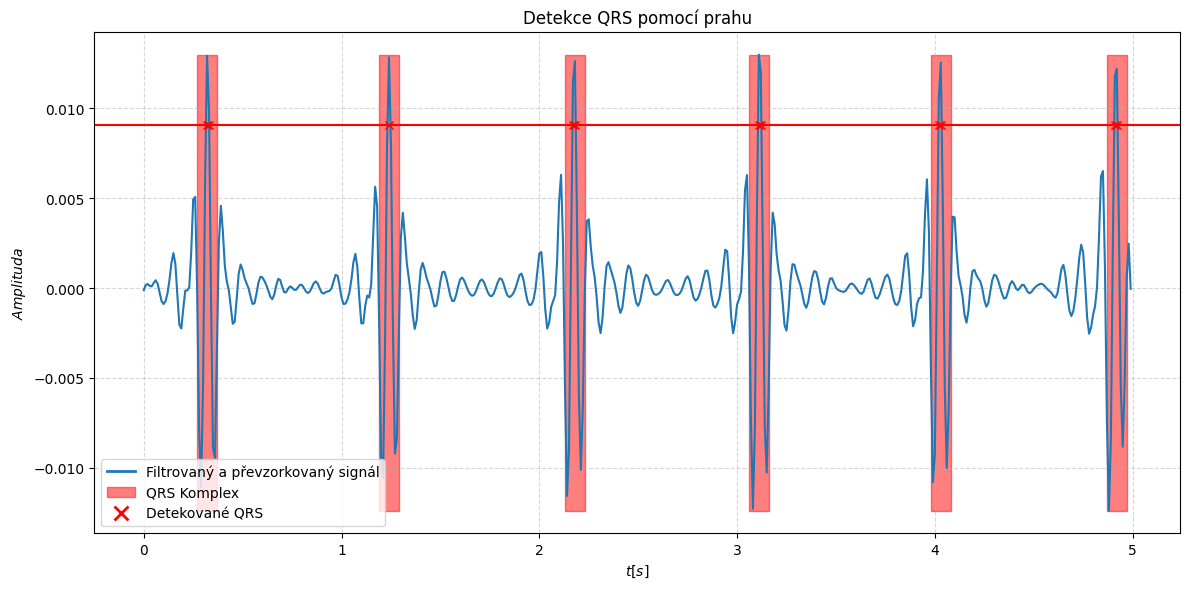

In [8]:
from matplotlib.lines import Line2D

percentage = 0.7
qrs_width = 0.1

min_amplitude = np.min(filtered_resampled_x_seg)
max_amplitude = np.max(filtered_resampled_x_seg)

legend_elements = [
    Line2D([0], [0], lw=2, label='Filtrovaný a převzorkovaný signál'),
    patches.Patch(facecolor='red', edgecolor='r', alpha=0.5, label='QRS Komplex'),
    Line2D([0], [0], marker='x', color='none', label='Detekované QRS', markersize=10, markeredgewidth=2, markeredgecolor='r'),
]

time_vector = np.arange(filtered_resampled_x_seg.size) / new_fs + odkud
sample_QRS = filtered_resampled_x_seg[(time_vector > 0) & (time_vector < 1)]
QRS_peak = np.max(np.abs(sample_QRS))
Threshold = QRS_peak * percentage
qrs_detect = time_vector[filtered_resampled_x_seg > Threshold]

grouped_qrs_indices = []
current_group = [qrs_detect[0]]

for i in range(1, len(qrs_detect)):
    if qrs_detect[i] - qrs_detect[i - 1] < qrs_width:
        current_group.append(qrs_detect[i])
    else:
        grouped_qrs_indices.append(current_group)
        current_group = [qrs_detect[i]]

if current_group:
    grouped_qrs_indices.append(current_group)


plt.figure(figsize=(12,6))
plt.plot(time_vector, filtered_resampled_x_seg, label='Signal')
plt.axhline(y=Threshold, color='red', label='Threshold')
plt.plot(qrs_detect, Threshold * np.ones_like(qrs_detect), 'rx', label='QRS Detections')
plt.title('Detekce QRS pomocí prahu')
plt.xlabel('$t[s]$')
plt.ylabel('$Amplituda$')
plt.legend(handles=legend_elements, loc='lower left')

for group in grouped_qrs_indices:
    group_indices = [np.argmin(np.abs(time_vector - t)) for t in group]
    peak_index = np.argmax(filtered_resampled_x_seg[group_indices])
    peak_time_index = group_indices[peak_index]
    peak_time = time_vector[peak_time_index]

    rect_height = max_amplitude - min_amplitude

    qrs_rect = patches.Rectangle((peak_time - qrs_width / 2, min_amplitude), qrs_width, rect_height,
                                 linewidth=1, edgecolor='r', facecolor='red', alpha=0.5)

    plt.gca().add_patch(qrs_rect)

plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()


b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

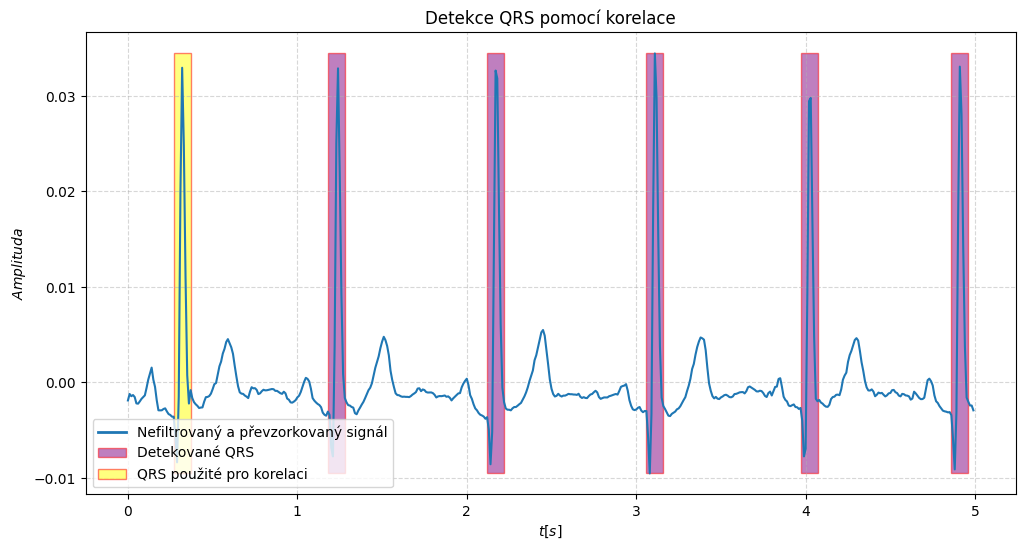

In [9]:
start_sample = 25
end_sample = 40
sample_QRS = resampled_x_seg[start_sample:end_sample]
sample_time_vector = time_vector[start_sample:end_sample]
percentage = 0.7


legend_elements = [
    Line2D([0], [0], lw=2, label='Nefiltrovaný a převzorkovaný signál'),
    patches.Patch(facecolor='purple', edgecolor='r', alpha=0.5, label='Detekované QRS'),
    patches.Patch(facecolor='yellow', edgecolor='r', alpha=0.5, label='QRS použité pro korelaci')
]

qrs_grouping_threshold = percentage * new_fs
autocorr_signal = np.correlate(resampled_x_seg, sample_QRS, mode='same')
autocorr_time_vector = np.arange(autocorr_signal.size) / new_fs

correlation_threshold = np.max(autocorr_signal) * percentage
detections = np.where(autocorr_signal > correlation_threshold)[0]

grouped_qrs_indices = []
current_group = [detections[0]]

for i in range(1, len(detections)):
    if detections[i] - detections[i - 1] < qrs_grouping_threshold:
        current_group.append(detections[i])
    else:
        grouped_qrs_indices.append(current_group)
        current_group = [detections[i]]

if current_group:
    grouped_qrs_indices.append(current_group)

ecg_min = np.min(resampled_x_seg)
ecg_max = np.max(resampled_x_seg)
plt.figure(figsize=(12, 6))
plt.plot(time_vector, resampled_x_seg)
plt.title('Detekce QRS pomocí korelace')
plt.xlabel('$t[s]$')
plt.ylabel('$Amplituda$')

for idx, group in enumerate(grouped_qrs_indices):
    avg_index = int(np.mean(group))
    qrs_time = time_vector[avg_index]

    rect_color = 'yellow' if idx == 0 else 'purple'

    rect_height = ecg_max - ecg_min

    qrs_rect = patches.Rectangle((qrs_time - qrs_width / 2, ecg_min), qrs_width, rect_height,
                                 linewidth=1, edgecolor='r', facecolor=rect_color, alpha=0.5)

    plt.gca().add_patch(qrs_rect)

plt.grid(alpha=0.5, linestyle='--')
plt.legend(handles=legend_elements, loc='lower left')

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

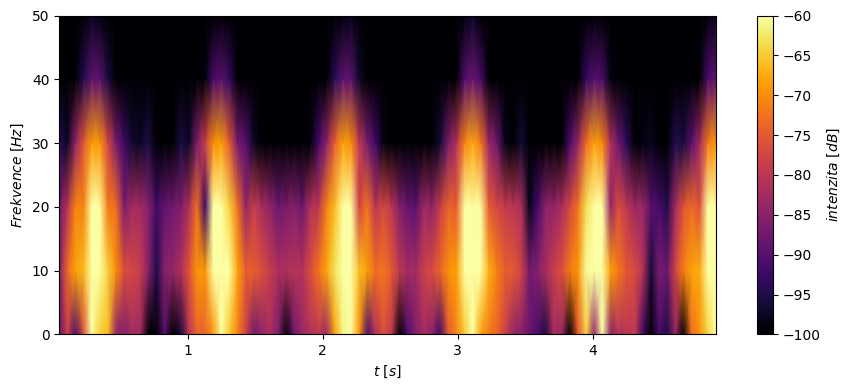

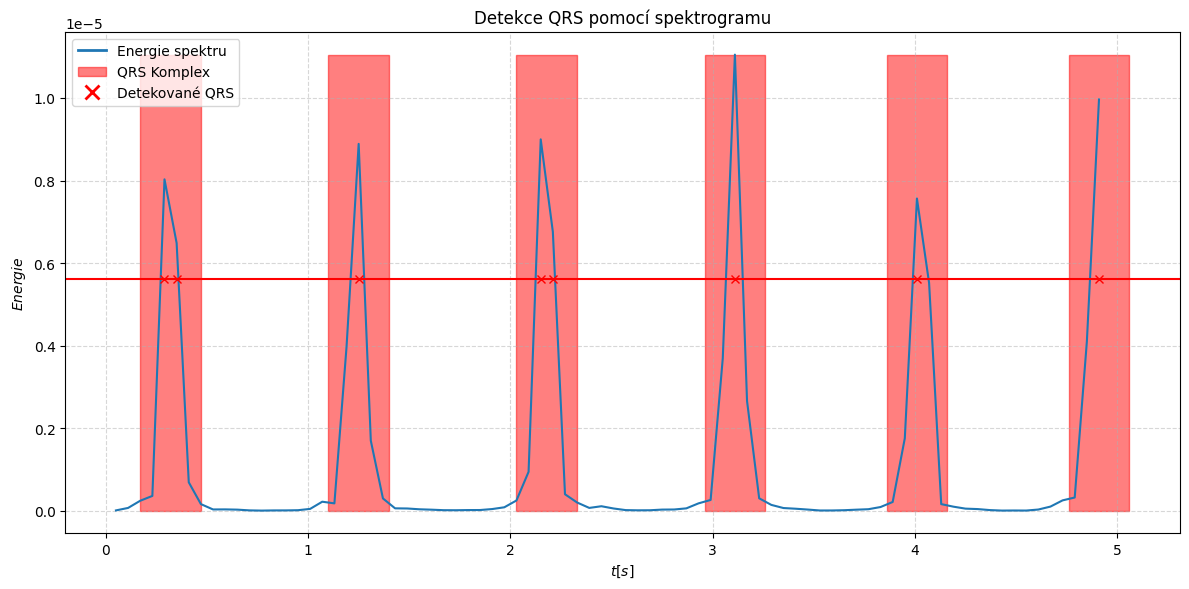

In [10]:
window_len = 10
hop_size = 6
percentage = 0.7

noverlap = window_len - hop_size

f, t, Sxx = spectrogram(filtered_resampled_x_seg, new_fs, window='hann',
                        nperseg=window_len, noverlap=noverlap)
Sxx_log = 10 * np.log10(Sxx + 1e-20)

t_normalized = t - t[0]
# Plot the spectrogram
plt.figure(figsize=(9, 4))
plt.ylabel('$Frekvence$ $[Hz]$')
plt.xlabel('$t$ $[s]$')

cmap = 'inferno'
spectrogram_plot = plt.pcolormesh(t, f, Sxx_log, shading='gouraud', cmap=cmap, vmin=-100, vmax=-60)
cbar = plt.colorbar(spectrogram_plot)
cbar.set_label('$intenzita$ $[dB]$')

plt.tight_layout()

legend_elements = [
    Line2D([0], [0], lw=2, label='Energie spektru'),
    patches.Patch(facecolor='red', edgecolor='r', alpha=0.5, label='QRS Komplex'),
    Line2D([0], [0], marker='x', color='none', label='Detekované QRS', markersize=10, markeredgewidth=2, markeredgecolor='r'),
]

qrs_width = 0.3

spectral_energy = np.sum(Sxx, axis=0)

sample_QRS = spectral_energy[(t > 0) & (t < 1)]
QRS_peak = np.max(sample_QRS)
Threshold = QRS_peak * percentage
qrs_detect = t[spectral_energy > Threshold]

grouped_qrs_times = []
current_group = [qrs_detect[0]]

for i in range(1, len(qrs_detect)):
    if qrs_detect[i] - qrs_detect[i - 1] < qrs_width:
        current_group.append(qrs_detect[i])
    else:
        grouped_qrs_times.append(current_group)
        current_group = [qrs_detect[i]]

if current_group:
    grouped_qrs_times.append(current_group)


plt.figure(figsize=(12,6))
plt.plot(t, spectral_energy)
plt.axhline(y=Threshold, color='red')
plt.plot(qrs_detect, Threshold * np.ones_like(qrs_detect), 'rx')

rect_width = qrs_width
rect_height = np.max(spectral_energy)

for group in grouped_qrs_times:
    center_time = np.mean(group)
    qrs_rect = patches.Rectangle((center_time - rect_width / 2, 0), rect_width, rect_height,
                                 linewidth=1, edgecolor='r', facecolor='red', alpha=0.5)
    plt.gca().add_patch(qrs_rect)


plt.title('Detekce QRS pomocí spektrogramu')
plt.xlabel('$t[s]$')
plt.ylabel('$Energie$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(handles=legend_elements, loc='upper left')
plt.tight_layout()


b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

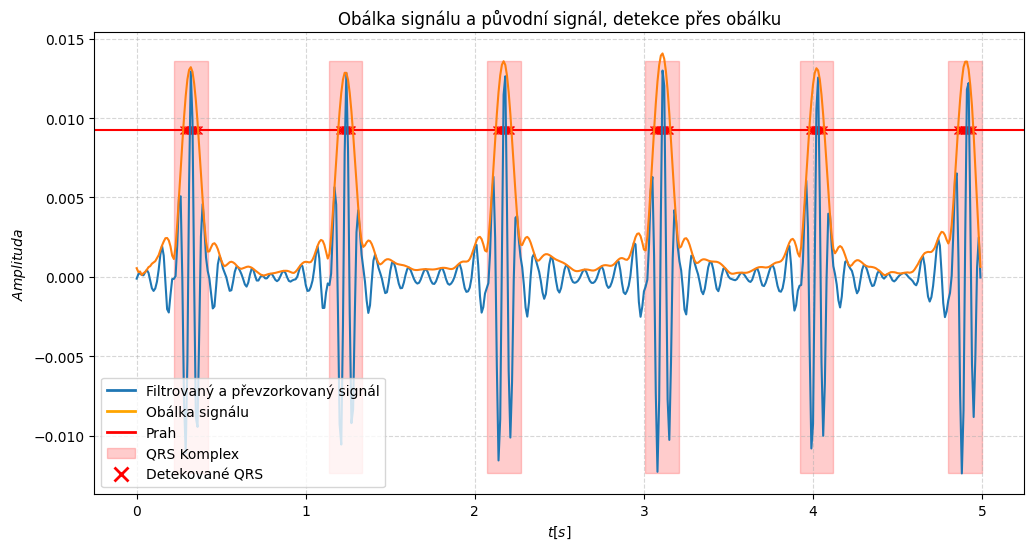

In [11]:
X_fft = np.fft.fft(filtered_resampled_x_seg)

N = len(X_fft)

legend_elements = [
    Line2D([0], [0], lw=2, label='Filtrovaný a převzorkovaný signál'),
    Line2D([0], [0], lw=2, color='orange', label='Obálka signálu'),
    Line2D([0], [0], lw=2, color='red', label='Prah'),
    patches.Patch(facecolor='red', edgecolor='r', alpha=0.2, label='QRS Komplex'),
    Line2D([0], [0], marker='x', color='none', label='Detekované QRS', markersize=10, markeredgewidth=2, markeredgecolor='r'),
]

U = np.array([1 if k < N/2 else 0 for k in range(N)])

H = np.zeros(N, dtype=complex)
H[0] = X_fft[0]  # DC komponenta zůstane nezměněna
if N % 2 == 0:
    H[1:N//2] = 2 * X_fft[1:N//2]
    H[N//2] = X_fft[N//2]
else:
    H[1:(N+1)//2] = 2 * X_fft[1:(N+1)//2]

xa = np.fft.ifft(H)

envelope = np.abs(xa)
percentage = 0.7

sample_QRS = envelope[(time_vector > 0) & (time_vector < 1)]
QRS_peak = np.max(sample_QRS)
Threshold = QRS_peak * percentage
qrs_detect = time_vector[envelope > Threshold]

qrs_width = 0.2

grouped_qrs_times = []
current_group = [qrs_detect[0]]

for i in range(1, len(qrs_detect)):
    if qrs_detect[i] - qrs_detect[i - 1] < qrs_width:
        current_group.append(qrs_detect[i])
    else:
        grouped_qrs_times.append(current_group)
        current_group = [qrs_detect[i]]

if current_group:
    grouped_qrs_times.append(current_group)

plt.figure(figsize=(12, 6))
plt.axhline(y=Threshold, color='red', label='Threshold')
plt.plot(qrs_detect, Threshold * np.ones_like(qrs_detect), 'rx', label='QRS Detections')

rect_width = qrs_width
rect_height = np.max(filtered_resampled_x_seg)
rect_start = np.min(filtered_resampled_x_seg)

for group in grouped_qrs_times:
    center_time = np.mean(group)
    qrs_rect = patches.Rectangle((center_time - rect_width / 2, rect_start), rect_width, rect_height*2,
                                 linewidth=1, edgecolor='r', facecolor='red', alpha=0.2)
    plt.gca().add_patch(qrs_rect)

plt.plot(time_vector, filtered_resampled_x_seg, label='Filtrovaný a převzorkovaný signál')
plt.plot(time_vector, envelope, label='Obálka signálu')
plt.title('Obálka signálu a původní signál, detekce přes obálku')
plt.xlabel('$t[s]$')
plt.ylabel('$Amplituda$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(handles=legend_elements)


c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*


Otočení signálu (tzv. flipnutí, kdy je signál invertován přes horizontální osu) může ovlivnit detekci QRS komplexů v závislosti na metodě, která je použita:

1. **Detekce na základě prahu (Threshold detection)**: Tato metoda může být ovlivněna flipnutím signálu, protože se obvykle spoléhá na detekci výšky vlny QRS komplexů nad určitým amplitudovým prahem. Pokud je signál flipnutý, komplex QRS by se objevil pod prahem a mohl by být přehlédnut.

2. **Detekce na základě korelace (Correlation detection)**: Korelační detekce porovnává segmenty EKG signálu s referenčním QRS vzorem. Flipnutí signálu může snížit korelaci mezi signálem a referenčním vzorem a tím vést k nesprávné detekci. Pokud by byl referenční vzor také flipnutý odpovídajícím způsobem, mohla by být detekce stále úspěšná.

3. **Detekce na základě spektrogramu (Spectrogram detection)**: Spektrogram detekce zkoumá frekvenční obsah signálu v čase a není obvykle ovlivněn flipnutím signálu, protože spektrální vlastnosti (například energie v určité frekvenční pásme) zůstávají stejné bez ohledu na to, zda je signál flipnutý.

4. **Detekce na základě obálky (Envelope detection)**: Metoda založená na obálce signálu může být také ovlivněna flipnutím signálu, protože obálka sleduje amplitudu signálu, a pokud je signál flipnutý, vrcholy a údolí QRS komplexů se obrátí. Pokud je však obálka založena na absolutní hodnotě signálu nebo na jeho energetickém obsahu, může být detekce robustní i při flipnutém signálu.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

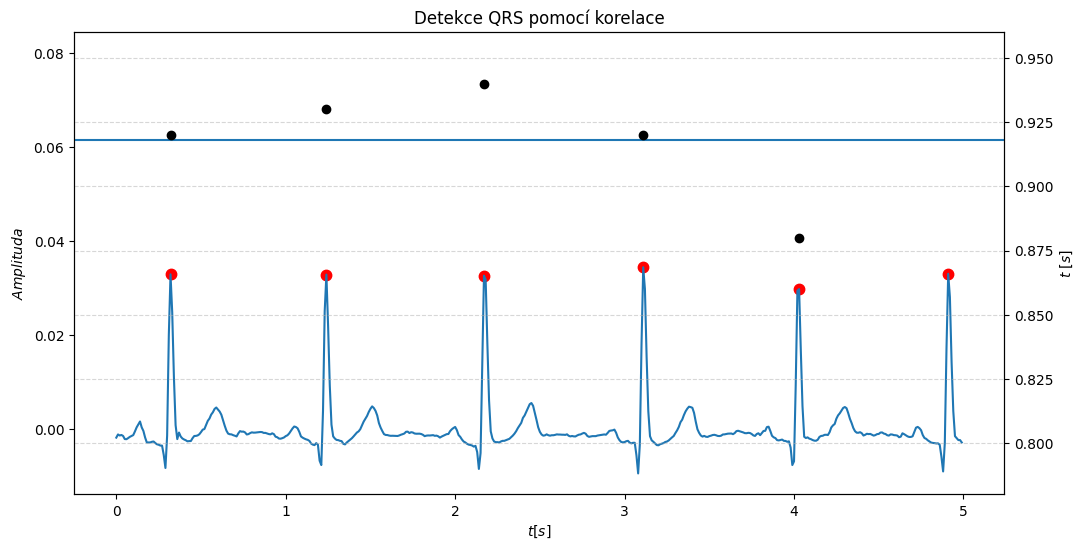

In [12]:
start_sample = 25
end_sample = 40
sample_QRS = resampled_x_seg[start_sample:end_sample]
sample_time_vector = time_vector[start_sample:end_sample]
percentage = 0.7

legend_elements = [
    Line2D([0], [0], lw=2, label='Nefiltrovaný a převzorkovaný signál'),
    patches.Patch(facecolor='purple', edgecolor='r', alpha=0.5, label='Detekované QRS'),
    patches.Patch(facecolor='yellow', edgecolor='r', alpha=0.5, label='QRS použité pro korelaci')
]

qrs_grouping_threshold = percentage * new_fs
autocorr_signal = np.correlate(resampled_x_seg, sample_QRS, mode='same')
autocorr_time_vector = np.arange(autocorr_signal.size) / new_fs

correlation_threshold = np.max(autocorr_signal) * percentage
detections = np.where(autocorr_signal > correlation_threshold)[0]

grouped_qrs_indices = []
current_group = [detections[0]]

for i in range(1, len(detections)):
    if detections[i] - detections[i - 1] < qrs_grouping_threshold:
        current_group.append(detections[i])
    else:
        grouped_qrs_indices.append(current_group)
        current_group = [detections[i]]

if current_group:
    grouped_qrs_indices.append(current_group)

plt.figure(figsize=(12, 6))
plt.title('Detekce QRS pomocí korelace')
plt.xlabel('$t[s]$')
plt.ylabel('$Amplituda$')

top_indices_x = []

for group in grouped_qrs_indices:
    max_index = np.argmax(resampled_x_seg[group])
    qrs_time = time_vector[group][max_index]
    qrs_amp = resampled_x_seg[group][max_index]
    plt.plot(qrs_time, qrs_amp, 'r.', markersize=15)
    top_indices_x.append(qrs_time)

plt.plot(time_vector, resampled_x_seg)
plt.axhline(y=0.08, color='w')
ax2 = plt.gca().twinx()
y_value_black = []

for i in range(0, len(top_indices_x)-1):
    diff = top_indices_x[i+1] - top_indices_x[i]
    y_value_black.append(diff)

avg_time = np.mean(y_value_black)
plt.axhline(y=avg_time, label='Stredni cas')

ax2.set_ylim([min(y_value_black) - 0.1, max(y_value_black) + 0.02])
ax2.set_ylabel('$t$ $[s]$')
ax2.grid(alpha=0.5, linestyle='--')

for i in range(0, len(y_value_black)):
    ax2.plot(top_indices_x[i], y_value_black[i], 'ko')


### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [13]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [14]:
# Zde napište váš kód